To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://docs.unsloth.ai/new/how-to-train-llms-with-unsloth-and-docker).

[gpt-oss RL](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning) is now supported with the fastest inference & lowest VRAM. Try our [new notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/gpt-oss-(20B)-GRPO.ipynb) which creates kernels!

Introducing [Vision](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl) and [Standby](https://docs.unsloth.ai/basics/memory-efficient-rl) for RL! Train Qwen, Gemma etc. VLMs with GSPO - even faster with less VRAM.

Unsloth now supports Text-to-Speech (TTS) models. Read our [guide here](https://docs.unsloth.ai/basics/text-to-speech-tts-fine-tuning).

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [ ]:
%%capture
!pip install --upgrade -qqq uv
try: import numpy; get_numpy = f"numpy=={numpy.__version__}"
except: get_numpy = "numpy"
!uv pip install -qqq \
    "torch>=2.8.0" "triton>=3.4.0" {get_numpy} torchvision bitsandbytes "transformers>=4.55.3" \
    "unsloth_zoo[base] @ git+https://github.com/unslothai/unsloth-zoo" \
    "unsloth[base] @ git+https://github.com/unslothai/unsloth" \
    git+https://github.com/triton-lang/triton.git@05b2c186c1b6c9a08375389d5efe9cb4c401c075#subdirectory=python/triton_kernels
!uv pip install --upgrade --no-deps transformers==4.56.2 tokenizers
!uv pip install --no-deps trl==0.22.2

In [ ]:
%%capture
!uv pip install --force-reinstall --no-deps git+https://github.com/unslothai/unsloth-zoo
!uv pip install --force-reinstall --no-deps git+https://github.com/unslothai/unsloth

### Unsloth

We're about to demonstrate the power of the new OpenAI GPT-OSS 20B model through an inference example. For our `MXFP4` version, use this [notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/GPT_OSS_MXFP4_(20B)-Inference.ipynb) instead.

In [ ]:
from unsloth import FastLanguageModel
import torch

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/gpt-oss-20b-unsloth-bnb-4bit", # 20B model using bitsandbytes 4bit quantization
    "unsloth/gpt-oss-120b-unsloth-bnb-4bit",
    "unsloth/gpt-oss-20b", # 20B model using MXFP4 format
    "unsloth/gpt-oss-120b",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/gpt-oss-20b-unsloth-bnb-4bit",
    dtype = None, # None for auto detection
    max_seq_length = 4096, # Choose any for long context!
    load_in_4bit = False,  # 4 bit quantization to reduce memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
    # token = "hf_...", # use one if using gated models
)

NotImplementedError: Unsloth currently only works on NVIDIA GPUs and Intel GPUs.

### Reasoning Effort
The `gpt-oss` models from OpenAI include a feature that allows users to adjust the model's "reasoning effort." This gives you control over the trade-off between the model's performance and its response speed (latency) which by the amount of token the model will use to think.

----

The `gpt-oss` models offer three distinct levels of reasoning effort you can choose from:

* **Low**: Optimized for tasks that need very fast responses and don't require complex, multi-step reasoning.
* **Medium**: A balance between performance and speed.
* **High**: Provides the strongest reasoning performance for tasks that require it, though this results in higher latency.

In [ ]:
from transformers import TextStreamer

messages = [
    {"role": "user", "content": "Solve x^5 + 3x^4 - 10 = 3."},
]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True,
    return_tensors = "pt",
    return_dict = True,
    reasoning_effort = "low", # **NEW!** Set reasoning effort to low, medium or high
).to("cuda")

_ = model.generate(**inputs, max_new_tokens = 512, streamer = TextStreamer(tokenizer))

<|start|>system<|message|>You are ChatGPT, a large language model trained by OpenAI.
Knowledge cutoff: 2024-06
Current date: 2025-10-08

Reasoning: low

# Valid channels: analysis, commentary, final. Channel must be included for every message.<|end|><|start|>user<|message|>Solve x^5 + 3x^4 - 10 = 3.<|end|><|start|>assistant<|channel|>analysis<|message|>Equation: x^5 + 3x^4 - 10 = 3 => x^5 + 3x^4 -13 =0. Solve? It's quintic. Maybe approximate roots. Likely only one real. Let's try integer guesses: x=1:1+3-13=-9. x=2:32+48-13=67. So root between1 and2. Try 1.2: (1.2)^5=2.48832, 3*(1.2)^4=3*2.0736=6.2208 sum=8.7091-13=-4.2909. 1.4: 1.4^5=5.37824, 1.4^4=3.8416*3=11.5248 sum=16.903 -13=3.903. So root between1.2 and1.4. Try1.3:1.3^5=3.71293,1.3^4=2.8561*3=8.5683 sum=12.2812-13=-0.7188. 1.32:1.32^5=4.037,1.32^4=2.944*3=8.833 sum=12.87-13=-0.13. 1.33:1.33^5=4.215,1.33^4=3.005*3=9.015 sum=13.23-13=0.23. So ~1.327. Quick linear: between1.32(-0.13) and1.33(0.23): root ~1.325. So approximate real 

Changing the `reasoning_effort` to `medium` will make the model think longer. We have to increase the `max_new_tokens` to occupy the amount of the generated tokens but it will give better and more correct answer

In [ ]:
from transformers import TextStreamer

messages = [
    {"role": "user", "content": "Solve x^5 + 3x^4 - 10 = 3."},
]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True,
    return_tensors = "pt",
    return_dict = True,
    reasoning_effort = "medium", # **NEW!** Set reasoning effort to low, medium or high
).to("cuda")

_ = model.generate(**inputs, max_new_tokens = 1024, streamer = TextStreamer(tokenizer))

<|start|>system<|message|>You are ChatGPT, a large language model trained by OpenAI.
Knowledge cutoff: 2024-06
Current date: 2025-10-06

Reasoning: medium

# Valid channels: analysis, commentary, final. Channel must be included for every message.<|end|><|start|>user<|message|>Solve x^5 + 3x^4 - 10 = 3.<|end|><|start|>assistant<|channel|>analysis<|message|>We need to parse the problem: Solve x^5 + 3x^4 - 10 = 3. Move terms: x^5 + 3x^4 - 13 = 0. That is equation. We need to find roots. Probably real root(s). Could factor? Try rational root test: possible roots ±1, ±13. Evaluate: at x=1: 1+3-13=-9 no. x= -1: -1 +3 -13 = -11. x=13: enormous. x=-13: negative huge. So no integer root. Maybe factoring with quadratic times cubic? Unlikely.

We can try to find approximate roots or maybe use substitution y = x^4? But x^5 + 3x^4 -13=0. Factor out x^4? x^4(x+3)-13=0. Then x^4(x+3)=13. Hard.

Solve numerically: Let f(x)=x^5+3 x^4 -13. Try x=1: -9. x=2: 32+3*16-13=32+48-13=67. So root between 1 and 

Lastly we will test it using `reasoning_effort` to `high`

In [ ]:
from transformers import TextStreamer

messages = [
    {"role": "user", "content": "How many s are there in the word sstawberry "},
]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True,
    return_tensors = "pt",
    return_dict = True,
    reasoning_effort = "low", # **NEW!** Set reasoning effort to low, medium or high
).to("cuda")

_ = model.generate(**inputs, max_new_tokens = 2048, streamer = TextStreamer(tokenizer))

<|start|>system<|message|>You are ChatGPT, a large language model trained by OpenAI.
Knowledge cutoff: 2024-06
Current date: 2025-10-08

Reasoning: low

# Valid channels: analysis, commentary, final. Channel must be included for every message.<|end|><|start|>user<|message|>How many s are there in the word sstawberry <|end|><|start|>assistant<|channel|>analysis<|message|>We need count of letter 's' in "sstawberry". The word: s s t a w b e r r y. So two s.<|end|><|start|>assistant<|channel|>final<|message|>There are **two** lowercase “s” characters in the word **“sstawberry”**.<|return|>


And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>


In [ ]:
from unsloth import FastLanguageModel

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/gpt-oss-20b-unsloth-bnb-4bit",
    dtype=None,
    load_in_4bit=False,
    attn_implementation="eager"
)

==((====))==  Unsloth 2025.10.1: Fast Gpt_Oss patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gpt_oss won't work! Using float32.
Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
import torch
from unsloth import FastLanguageModel

# ----------------------
# Load model locally
# ----------------------
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/gpt-oss-20b-unsloth-bnb-4bit",
    dtype=None,          # auto detect
    load_in_4bit=True, # Changed to True to load in 4-bit quantization
    attn_implementation="eager"# FP16 for logprobs
)

==((====))==  Unsloth 2025.10.1: Fast Gpt_Oss patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gpt_oss won't work! Using float32.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.37G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/165 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/27.9M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/446 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# model = model.to(device) # Removed this line as .to() is not supported for bitsandbytes models
model.eval()

# ----------------------
# Prompt + Target
# ----------------------
prompt = "Explain log probabilities under 50 words."
target_output = ("Log probabilities are a way to measure the confidence of a language model "
                 "in producing each token in a sequence. By summing the log-probs, we get "
                 "an overall score for the target sequence given the prompt.")

# ----------------------
# Encode inputs
# ----------------------
inputs = tokenizer(prompt, return_tensors="pt").to(device)
target_ids = tokenizer(target_output, return_tensors="pt").input_ids.to(device)

# Concatenate prompt + target
input_ids = torch.cat([inputs.input_ids, target_ids], dim=1)

# ----------------------
# Forward pass
# ----------------------
with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits  # [batch, seq_len, vocab]

# Focus on target tokens only
shift_logits = logits[:, -target_ids.size(1)-1:-1, :]
shift_labels = target_ids

log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)
tgt_log_probs = log_probs.gather(2, shift_labels.unsqueeze(-1)).squeeze(-1)

# Total log probability for the target sequence
total_logprob = tgt_log_probs.sum().item()
print("Total log probability:", total_logprob)

# Optional: top-k probabilities for each token
top_k = 5
for i, token_id in enumerate(target_ids[0]):
    probs = torch.softmax(shift_logits[0, i], dim=-1)
    top_probs, top_indices = torch.topk(probs, top_k)
    token_str = tokenizer.decode(token_id)
    print(f"Token: {token_str}")
    for p, idx in zip(top_probs, top_indices):
        print(f"   {tokenizer.decode(idx.item())}: {p.item():.4f}")

Total log probability: -135.125
Token: Log
   

: 0.4802
   **

: 0.0329
   **: 0.0293
     
: 0.0245
    The: 0.0201
Token:  probabilities
    probabilities: 0.1991
    probability: 0.1379
   :: 0.0263
   
: 0.0211
    : 0.0174
Token:  are
    are: 0.3708
    can: 0.0538
    represent: 0.0406
   :: 0.0262
    in: 0.0254
Token:  a
    a: 0.0685
    the: 0.0581
    log: 0.0555
    used: 0.0235
    : 0.0153
Token:  way
    set: 0.0260
    **: 0.0168
    measure: 0.0166
   

: 0.0126
    well: 0.0123
Token:  to
    to: 0.6367
    of: 0.1942
   

: 0.0090
    for: 0.0079
    that: 0.0066
Token:  measure
    use: 0.0345
    measure: 0.0309
    set: 0.0169
    the: 0.0142
    calculate: 0.0107
Token:  the
    the: 0.3313
    how: 0.0837
    and: 0.0318
    or: 0.0205
    a: 0.0157
Token:  confidence
    likelihood: 0.1276
    probability: 0.1091
    probabilities: 0.0132
    number: 0.0093
    chance: 0.0088
Token:  of
    in: 0.2357
    of: 0.1725
    level: 0.1571
    or: 0.1272
    that: 

In [ ]:
import torch
from unsloth import FastLanguageModel
import numpy as np # Import numpy

# -----------------------------
# Inputs
# -----------------------------
prompt = "explain deep leaning in 50 words"
target_output = ("""
Deep learning is a subset of machine learning that uses multi-layered neural
networks to learn from vast amounts of data. Inspired by the human brain's structure, these
networks automatically identify patterns and features, enabling them to perform complex tasks
like image recognition, natural language processing, and autonomous driving
"""
)
# prompt_tokens = prompt.split() # Keep original prompt for heatmap
target_ids = tokenizer(target_output).input_ids

# -----------------------------
# Function: compute log probabilities
# -----------------------------
def compute_logprobs(prompt, target_text):
    """Return total log probability of target_text given the prompt."""
    inputs = tokenizer.apply_chat_template(
        [{"role": "user", "content": prompt}],
        add_generation_prompt=True,
        return_tensors="pt",
        return_dict=True
    ).to(model.device)

    target_input_ids = tokenizer(target_text).input_ids
    all_input_ids = torch.cat([inputs.input_ids, torch.tensor([target_input_ids], device=model.device)], dim=1)

    with torch.no_grad():
        outputs = model(all_input_ids)
        logits = outputs.logits  # shape: [1, seq_len, vocab_size]

    # Only consider target tokens
    shift_logits = logits[:, -len(target_input_ids)-1:-1, :]
    shift_labels = torch.tensor([target_input_ids], device=model.device)

    log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)
    token_log_probs = log_probs.gather(2, shift_labels.unsqueeze(-1)).squeeze(-1)  # [1, tgt_len]

    return token_log_probs.squeeze(0).cpu().numpy(), float(token_log_probs.sum())

# -----------------------------
# Baseline
# -----------------------------
baseline_token_probs, baseline_total_logprob = compute_logprobs(prompt, target_output)
print(f"Baseline total log probability: {baseline_total_logprob:.3f}")

# -----------------------------
# Leave-One-Out: prompt token importance
# -----------------------------
importance_scores = []
prompt_tokens = prompt.split() # Define prompt_tokens here for the loop
for i, tok in enumerate(prompt_tokens):
    modified_prompt = " ".join(prompt_tokens[:i] + prompt_tokens[i+1:])
    _, total_lp = compute_logprobs(modified_prompt, target_output)
    importance = baseline_total_logprob - total_lp
    importance_scores.append(importance)

# Normalize to 0–1
importance_scores = np.array(importance_scores)
importance_scores = (importance_scores - importance_scores.min()) / (np.ptp(importance_scores) + 1e-8)

# -----------------------------
# Print token importance
# -----------------------------
print("\nToken Importance Scores:")
for tok, score in zip(prompt_tokens, importance_scores):
    print(f"{tok:<15} -> {score:.3f}")

# -----------------------------
# Heatmap visualization
# -----------------------------
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib

plt.figure(figsize=(max(10, len(prompt_tokens)), 1.5))
sns.heatmap([importance_scores], annot=[prompt_tokens], fmt="", cmap="RdYlGn", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Prompt Token Importance (OSS-20B)")
plt.show()

RuntimeError: mat1 and mat2 must have the same dtype, but got Float and Half

# Shapley

Baseline total log probability (full prompt): -738.0000



Shapley permutations: 100%|██████████| 60/60 [01:44<00:00,  1.73s/it]

Token-wise Shapley (raw logprob contribution):
explain         -97.745833
deep            -48.725000
leaning         -44.291667
in               7.916667
50              -64.341667
words           -77.562500

Normalized 0..1 (for heatmap display):
explain         0.000
deep            0.464
leaning         0.506
in              1.000
50              0.316
words           0.191


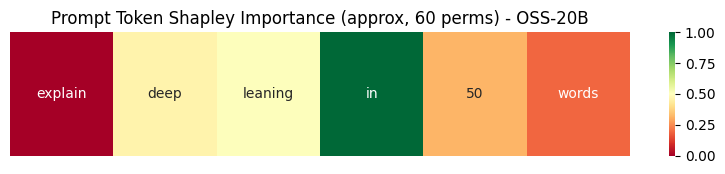

In [ ]:
# Shapley approx for prompt token importance using OSS-20B (Unsloth)
# Requires: unsloth model + tokenizer loaded as `model, tokenizer`
# If you haven't loaded, uncomment the load block and set model_name accordingly.

import torch
import numpy as np
from tqdm import tqdm
import random
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Optional: load model/tokenizer (uncomment if not already loaded)
# ---------------------------
# from unsloth import FastLanguageModel
# model_name = "unsloth/gpt-oss-20b-unsloth-bnb-4bit"
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name=model_name,
#     dtype=None,
#     max_seq_length=4096,
#     load_in_4bit=False,
#     full_finetuning=False
# )
# if torch.cuda.is_available():
#     model = model.to("cuda")
# model.eval()

device = "cuda" if torch.cuda.is_available() else "cpu"

# ---------------------------
# User prompt + target (kept same as your provided example)
# ---------------------------
prompt = "explain deep leaning in 50 words"
target_output = ("""
Deep learning is a subset of machine learning that uses multi-layered neural
networks to learn from vast amounts of data. Inspired by the human brain's structure, these
networks automatically identify patterns and features, enabling them to perform complex tasks
like image recognition, natural language processing, and autonomous driving
""")

# Work at whitespace token granularity to stay consistent with your previous code
prompt_tokens = prompt.split()

# ---------------------------
# Reuse compute_logprobs function (returns per-token logprobs and total)
# ---------------------------
def compute_logprobs(prompt_text, target_text):
    """
    Returns (token_logprob_array, total_logprob)
    - token_logprob_array: numpy array of shape (tgt_len,) with log-probs for each target token
    - total_logprob: float sum of token log-probs
    """
    # Build model-specific input using apply_chat_template (same pattern as your code)
    inputs = tokenizer.apply_chat_template(
        [{"role": "user", "content": prompt_text}],
        add_generation_prompt=True,
        return_tensors="pt",
        return_dict=True
    ).to(model.device)

    tgt_ids = tokenizer(target_text).input_ids
    # cat into a single tensor
    all_input_ids = torch.cat([inputs.input_ids, torch.tensor([tgt_ids], device=model.device)], dim=1)

    with torch.no_grad():
        outputs = model(all_input_ids)
        logits = outputs.logits  # shape [1, seq_len, vocab_size]

    # target slice: last len(tgt_ids) tokens -> logits that predicted them are previous positions
    shift_logits = logits[:, -len(tgt_ids)-1:-1, :]  # shape [1, tgt_len, vocab]
    shift_labels = torch.tensor([tgt_ids], device=model.device)

    log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)
    token_log_probs = log_probs.gather(2, shift_labels.unsqueeze(-1)).squeeze(-1)  # [1, tgt_len]

    return token_log_probs.squeeze(0).cpu().numpy(), float(token_log_probs.sum())

# ---------------------------
# Baseline: full prompt
# ---------------------------
baseline_token_logprobs, baseline_total_logprob = compute_logprobs(prompt, target_output)
print(f"Baseline total log probability (full prompt): {baseline_total_logprob:.4f}\n")

# ---------------------------
# Shapley approximation via permutation sampling
# ---------------------------
def prompt_from_subset(tokens_list, subset_indices):
    """Return string prompt containing tokens in original order for indices in subset_indices."""
    if not subset_indices:
        return ""  # we will handle empty subset specially
    return " ".join([tokens_list[i] for i in sorted(subset_indices)])

def approximate_shapley(tokens_list, target_text, model_logprob_func, num_permutations=60, seed=0):
    """
    Approximate Shapley values via random permutation sampling.
    Returns dict mapping token index -> shapley value (raw, on logprob scale).
    """
    random.seed(seed)
    n = len(tokens_list)
    phi = [0.0] * n
    cache = {}

    # Compute a safe v(empty). Try with empty prompt; if model fails, fallback to baseline (conservative).
    try:
        v_empty_arr, v_empty = model_logprob_func("", target_text)
    except Exception:
        # fallback: use minimal prompt as full prompt (conservative fallback)
        v_empty = baseline_total_logprob  # not ideal but avoids crashes
        print("Warning: model failed for empty prompt; using baseline total logprob as v(empty) fallback.")
    else:
        # If succeeded, use computed value
        pass

    def v_of_subset(sorted_tuple):
        # sorted_tuple: tuple of token indices
        if sorted_tuple in cache:
            return cache[sorted_tuple]
        prompt_text = prompt_from_subset(tokens_list, sorted_tuple)
        try:
            _, val = model_logprob_func(prompt_text, target_text)
        except Exception as e:
            # If empty prompt errors, fallback to v_empty or baseline
            val = v_empty if 'v_empty' in locals() else baseline_total_logprob
        cache[sorted_tuple] = val
        return val

    # Sample permutations
    for _ in tqdm(range(num_permutations), desc="Shapley permutations"):
        perm = list(range(n))
        random.shuffle(perm)
        S = []
        for idx in perm:
            S_sorted = tuple(sorted(S))
            v_S = v_of_subset(S_sorted)
            S_with_i = tuple(sorted(S + [idx]))
            v_Si = v_of_subset(S_with_i)
            marginal = v_Si - v_S
            phi[idx] += marginal
            S.append(idx)

    # Average
    shap_vals = [x / num_permutations for x in phi]
    return {i: shap_vals[i] for i in range(n)}

# Run approximation (tune num_permutations as needed)
num_perm = 60  # increase for better precision, at cost of compute
shapley_raw = approximate_shapley(prompt_tokens, target_output, compute_logprobs, num_permutations=num_perm, seed=42)

# ---------------------------
# Normalize & print results (0..1 scaling)
# ---------------------------
raw_vals = np.array([shapley_raw[i] for i in range(len(prompt_tokens))])
# Shapley values can be negative/positive; for display we map to 0..1 by shifting
minv, maxv = raw_vals.min(), raw_vals.max()
if maxv - minv > 1e-12:
    normalized = (raw_vals - minv) / (maxv - minv)
else:
    normalized = np.zeros_like(raw_vals)

print("Token-wise Shapley (raw logprob contribution):")
for tok, val in zip(prompt_tokens, raw_vals):
    print(f"{tok:<15} {val: .6f}")
print("\nNormalized 0..1 (for heatmap display):")
for tok, val in zip(prompt_tokens, normalized):
    print(f"{tok:<15} {val:.3f}")

# ---------------------------
# Heatmap visualization (green = important)
# ---------------------------
plt.figure(figsize=(max(10, len(prompt_tokens)), 1.6))
sns.heatmap([normalized], annot=[prompt_tokens], fmt="", cmap="RdYlGn", cbar=True, xticklabels=False, yticklabels=False)
plt.title(f"Prompt Token Shapley Importance (approx, {num_perm} perms) - OSS-20B")
plt.show()


## 200 Permutations

Baseline total log probability (full prompt): -738.0000



Shapley permutations: 100%|██████████| 500/500 [01:44<00:00,  4.80it/s]

Token-wise Shapley (raw logprob contribution):
explain         -101.525000
deep            -53.844500
leaning         -29.427500
in              -1.193000
50              -55.619500
words           -83.140500

Normalized 0..1 (for heatmap display):
explain         0.000
deep            0.475
leaning         0.719
in              1.000
50              0.458
words           0.183


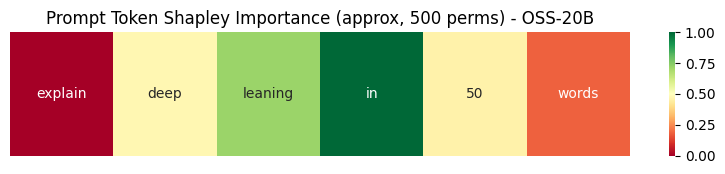

In [ ]:
# Shapley approx for prompt token importance using OSS-20B (Unsloth)
# Requires: unsloth model + tokenizer loaded as `model, tokenizer`
# If you haven't loaded, uncomment the load block and set model_name accordingly.

import torch
import numpy as np
from tqdm import tqdm
import random
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Optional: load model/tokenizer (uncomment if not already loaded)
# ---------------------------
# from unsloth import FastLanguageModel
# model_name = "unsloth/gpt-oss-20b-unsloth-bnb-4bit"
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name=model_name,
#     dtype=None,
#     max_seq_length=4096,
#     load_in_4bit=False,
#     full_finetuning=False
# )
# if torch.cuda.is_available():
#     model = model.to("cuda")
# model.eval()

device = "cuda" if torch.cuda.is_available() else "cpu"

# ---------------------------
# User prompt + target (kept same as your provided example)
# ---------------------------
prompt = "explain deep leaning in 50 words"
target_output = ("""
Deep learning is a subset of machine learning that uses multi-layered neural
networks to learn from vast amounts of data. Inspired by the human brain's structure, these
networks automatically identify patterns and features, enabling them to perform complex tasks
like image recognition, natural language processing, and autonomous driving
""")

# Work at whitespace token granularity to stay consistent with your previous code
prompt_tokens = prompt.split()

# ---------------------------
# Reuse compute_logprobs function (returns per-token logprobs and total)
# ---------------------------
def compute_logprobs(prompt_text, target_text):
    """
    Returns (token_logprob_array, total_logprob)
    - token_logprob_array: numpy array of shape (tgt_len,) with log-probs for each target token
    - total_logprob: float sum of token log-probs
    """
    # Build model-specific input using apply_chat_template (same pattern as your code)
    inputs = tokenizer.apply_chat_template(
        [{"role": "user", "content": prompt_text}],
        add_generation_prompt=True,
        return_tensors="pt",
        return_dict=True
    ).to(model.device)

    tgt_ids = tokenizer(target_text).input_ids
    # cat into a single tensor
    all_input_ids = torch.cat([inputs.input_ids, torch.tensor([tgt_ids], device=model.device)], dim=1)

    with torch.no_grad():
        outputs = model(all_input_ids)
        logits = outputs.logits  # shape [1, seq_len, vocab_size]

    # target slice: last len(tgt_ids) tokens -> logits that predicted them are previous positions
    shift_logits = logits[:, -len(tgt_ids)-1:-1, :]  # shape [1, tgt_len, vocab]
    shift_labels = torch.tensor([tgt_ids], device=model.device)

    log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)
    token_log_probs = log_probs.gather(2, shift_labels.unsqueeze(-1)).squeeze(-1)  # [1, tgt_len]

    return token_log_probs.squeeze(0).cpu().numpy(), float(token_log_probs.sum())

# ---------------------------
# Baseline: full prompt
# ---------------------------
baseline_token_logprobs, baseline_total_logprob = compute_logprobs(prompt, target_output)
print(f"Baseline total log probability (full prompt): {baseline_total_logprob:.4f}\n")

# ---------------------------
# Shapley approximation via permutation sampling
# ---------------------------
def prompt_from_subset(tokens_list, subset_indices):
    """Return string prompt containing tokens in original order for indices in subset_indices."""
    if not subset_indices:
        return ""  # we will handle empty subset specially
    return " ".join([tokens_list[i] for i in sorted(subset_indices)])

def approximate_shapley(tokens_list, target_text, model_logprob_func, num_permutations=200, seed=0):
    """
    Approximate Shapley values via random permutation sampling.
    Returns dict mapping token index -> shapley value (raw, on logprob scale).
    """
    random.seed(seed)
    n = len(tokens_list)
    phi = [0.0] * n
    cache = {}

    # Compute a safe v(empty). Try with empty prompt; if model fails, fallback to baseline (conservative).
    try:
        v_empty_arr, v_empty = model_logprob_func("", target_text)
    except Exception:
        # fallback: use minimal prompt as full prompt (conservative fallback)
        v_empty = baseline_total_logprob  # not ideal but avoids crashes
        print("Warning: model failed for empty prompt; using baseline total logprob as v(empty) fallback.")
    else:
        # If succeeded, use computed value
        pass

    def v_of_subset(sorted_tuple):
        # sorted_tuple: tuple of token indices
        if sorted_tuple in cache:
            return cache[sorted_tuple]
        prompt_text = prompt_from_subset(tokens_list, sorted_tuple)
        try:
            _, val = model_logprob_func(prompt_text, target_text)
        except Exception as e:
            # If empty prompt errors, fallback to v_empty or baseline
            val = v_empty if 'v_empty' in locals() else baseline_total_logprob
        cache[sorted_tuple] = val
        return val

    # Sample permutations
    for _ in tqdm(range(num_permutations), desc="Shapley permutations"):
        perm = list(range(n))
        random.shuffle(perm)
        S = []
        for idx in perm:
            S_sorted = tuple(sorted(S))
            v_S = v_of_subset(S_sorted)
            S_with_i = tuple(sorted(S + [idx]))
            v_Si = v_of_subset(S_with_i)
            marginal = v_Si - v_S
            phi[idx] += marginal
            S.append(idx)

    # Average
    shap_vals = [x / num_permutations for x in phi]
    return {i: shap_vals[i] for i in range(n)}

# Run approximation (tune num_permutations as needed)
num_perm = 500  # increase for better precision, at cost of compute
shapley_raw = approximate_shapley(prompt_tokens, target_output, compute_logprobs, num_permutations=num_perm, seed=42)

# ---------------------------
# Normalize & print results (0..1 scaling)
# ---------------------------
raw_vals = np.array([shapley_raw[i] for i in range(len(prompt_tokens))])
# Shapley values can be negative/positive; for display we map to 0..1 by shifting
minv, maxv = raw_vals.min(), raw_vals.max()
if maxv - minv > 1e-12:
    normalized = (raw_vals - minv) / (maxv - minv)
else:
    normalized = np.zeros_like(raw_vals)

print("Token-wise Shapley (raw logprob contribution):")
for tok, val in zip(prompt_tokens, raw_vals):
    print(f"{tok:<15} {val: .6f}")
print("\nNormalized 0..1 (for heatmap display):")
for tok, val in zip(prompt_tokens, normalized):
    print(f"{tok:<15} {val:.3f}")

# ---------------------------
# Heatmap visualization (green = important)
# ---------------------------
plt.figure(figsize=(max(10, len(prompt_tokens)), 1.6))
sns.heatmap([normalized], annot=[prompt_tokens], fmt="", cmap="RdYlGn", cbar=True, xticklabels=False, yticklabels=False)
plt.title(f"Prompt Token Shapley Importance (approx, {num_perm} perms) - OSS-20B")
plt.show()


## How to generate response?

In [ ]:
from transformers import TextStreamer

messages = [
    {"role": "user", "content": "who threw apple at gregor samsa"},
]

# Function to generate and process output
def generate_and_process(messages, model, tokenizer, reasoning_effort="low"):
    inputs = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt = True,
        return_tensors = "pt",
        return_dict = True,
        reasoning_effort = reasoning_effort, # Set reasoning effort
    ).to("cuda")

    # Generate without streamer to get the full output at once
    outputs = model.generate(**inputs, max_new_tokens = 512) # Removed streamer

    # Decode the output
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False) # Keep special tokens to identify channels

    # --- Parse the output to separate channels ---
    final_response = ""
    analysis = ""
    commentary = ""

    # Split by channel markers
    parts = generated_text.split("<|channel|>")
    if len(parts) > 1:
        for part in parts[1:]:
            if "<|message|>" in part:
                channel_name, message_content = part.split("<|message|>", 1)
                message_content = message_content.split("<|end|>", 1)[0].strip()
                if channel_name.strip() == "final":
                    final_response += message_content + "\n"
                elif channel_name.strip() == "analysis":
                    analysis += message_content + "\n"
                elif channel_name.strip() == "commentary":
                    commentary += message_content + "\n"
    else:
        # If no channel markers found, assume the whole output is the final response
        final_response = generated_text

    # Combine analysis and commentary into 'thinking'
    thinking_output = ""
    if analysis:
        thinking_output += "Analysis:\n" + analysis
    if commentary:
        if thinking_output:
            thinking_output += "\n"
        thinking_output += "Commentary:\n" + commentary

    # Remove <|return|> token from final response
    final_response = final_response.replace("<|return|>", "").strip()

    return thinking_output, final_response

# --- Example with thinking (low reasoning effort) ---
print("--- With Thinking (low reasoning effort) ---")
thinking, final = generate_and_process(messages, model, tokenizer, reasoning_effort="low")
print(thinking)
print("\nFinal Response:")
print(final)

# --- Example without thinking (reasoning_effort="none") ---
print("\n--- Without Thinking (reasoning_effort=\"none\") ---")
thinking_no_thinking, final_no_thinking = generate_and_process(messages, model, tokenizer, reasoning_effort="none")
print(thinking_no_thinking)
print("\nFinal Response:")
print(final_no_thinking)

--- With Thinking (low reasoning effort) ---
Analysis:
We have a literary question: "who threw apple at Gregor Samsa". In Kafka's "The Metamorphosis", there's a scene where someone throws a fruit at Gregor. The protagonist's brother? It's likely that the father throws an apple? I recall a scene: Two guys, a boy named Benda? It's the neighbor. Actually, in the story, Mr. and Mrs. Samsa throw apples at each other? Wait: In chapter II, a boy named Benda throws apples at Hans and Jutta? Actually, the detail: In the story after the transformation, the family finds a glass of wine, then a neighbor, a boy, is thrown a glass of wine? But the apple throw is by the girl (the sister?) Actually, the "apple thrower" is the child of the man the Samsas go to for the apartment. It's unclear.

Wait: In Kafka's The Metamorphosis, there is a scene where the family receives an apple from the "young woman" of the house; he is thrown an apple?

But the question: "who threw apple at Gregor Samsa". I think it

In [ ]:
from transformers import TextStreamer

messages = [
    {"role": "user", "content": "think thouroughly and answer who threw apple at gregor samsa"},
]

# Function to generate and process output
def generate_and_process(messages, model, tokenizer, reasoning_effort="high"):
    inputs = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt = True,
        return_tensors = "pt",
        return_dict = True,
        reasoning_effort = reasoning_effort, # Set reasoning effort
    ).to("cuda")

    # Generate without streamer to get the full output at once
    outputs = model.generate(**inputs, max_new_tokens = 2000) # Removed streamer

    # Decode the output
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=False) # Keep special tokens to identify channels

    # --- Parse the output to separate channels ---
    final_response = ""
    analysis = ""
    commentary = ""

    # Split by channel markers
    parts = generated_text.split("<|channel|>")
    if len(parts) > 1:
        for part in parts[1:]:
            if "<|message|>" in part:
                channel_name, message_content = part.split("<|message|>", 1)
                message_content = message_content.split("<|end|>", 1)[0].strip()
                if channel_name.strip() == "final":
                    final_response += message_content + "\n"
                elif channel_name.strip() == "analysis":
                    analysis += message_content + "\n"
                elif channel_name.strip() == "commentary":
                    commentary += message_content + "\n"
    else:
        # If no channel markers found, assume the whole output is the final response
        final_response = generated_text

    # Combine analysis and commentary into 'thinking'
    thinking_output = ""
    if analysis:
        thinking_output += "Analysis:\n" + analysis
    if commentary:
        if thinking_output:
            thinking_output += "\n"
        thinking_output += "Commentary:\n" + commentary

    # Remove <|return|> token from final response
    final_response = final_response.replace("<|return|>", "").strip()

    return thinking_output, final_response

# --- Example with thinking (low reasoning effort) ---
print("--- With Thinking (low reasoning effort) ---")
thinking, final = generate_and_process(messages, model, tokenizer, reasoning_effort="low")
print(thinking)
print("\nFinal Response:")
print(final)

# --- Example without thinking (reasoning_effort="none") ---
print("\n--- Without Thinking (reasoning_effort=\"none\") ---")
thinking_no_thinking, final_no_thinking = generate_and_process(messages, model, tokenizer, reasoning_effort="none")
print(thinking_no_thinking)
print("\nFinal Response:")
print(final_no_thinking)

--- With Thinking (low reasoning effort) ---
Analysis:
Need to answer: who threw apple at Gregor Samsa? It's fictional: In Kafka's The Metamorphosis, Gregor is transformed into insect. No mention of apple thrown. Perhaps someone? There is no such event. So I'd explain there is no record.


Final Response:
In **F. K. Kafka’s novella *The Metamorphosis*, there is no scene in which an apple is thrown at Gregor Samsa**.  The plot follows Gregor’s sudden, inexplicable transformation into a large insect, and the story focuses on his family’s reaction and the subsequent decline in their fortunes.  The novel never describes any assault involving an apple—neither on Gregor nor on any other character.  So, short answer: **no one threw an apple at Gregor Samsa, because that event doesn’t exist in the text.**

--- Without Thinking (reasoning_effort="none") ---
Analysis:
The user says: "think thouroughly and answer who threw apple at gregor samsa". They ask who threw apple at Gregor Samsa. It's a f

In [ ]:
import torch
from unsloth import FastLanguageModel

# ----------------------
# Load model locally
# ----------------------
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/gpt-oss-20b-unsloth-bnb-4bit",
    dtype=None,          # auto detect
    load_in_4bit=True, # Changed to True to load in 4-bit quantization
    attn_implementation="eager"# FP16 for logprobs
)

NotImplementedError: Unsloth currently only works on NVIDIA GPUs and Intel GPUs.

# Heat Map (words)

In [ ]:
import torch
from unsloth import FastLanguageModel

# ----------------------
# Load model locally
# ----------------------
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/gpt-oss-20b-unsloth-bnb-4bit",
    dtype=None,          # auto detect
    load_in_4bit=True, # Changed to True to load in 4-bit quantization
    attn_implementation="eager"# FP16 for logprobs
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.1: Fast Gpt_Oss patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gpt_oss won't work! Using float32.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.37G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/165 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/27.9M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/446 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

Computing baseline (full prompt) logprobs... (this will run the model once)
Baseline total logprob: -280.7500 over 63 output tokens
Running 60 permutations (this may be slow).


Shapley perms: 100%|██████████| 60/60 [01:52<00:00,  1.88s/it]


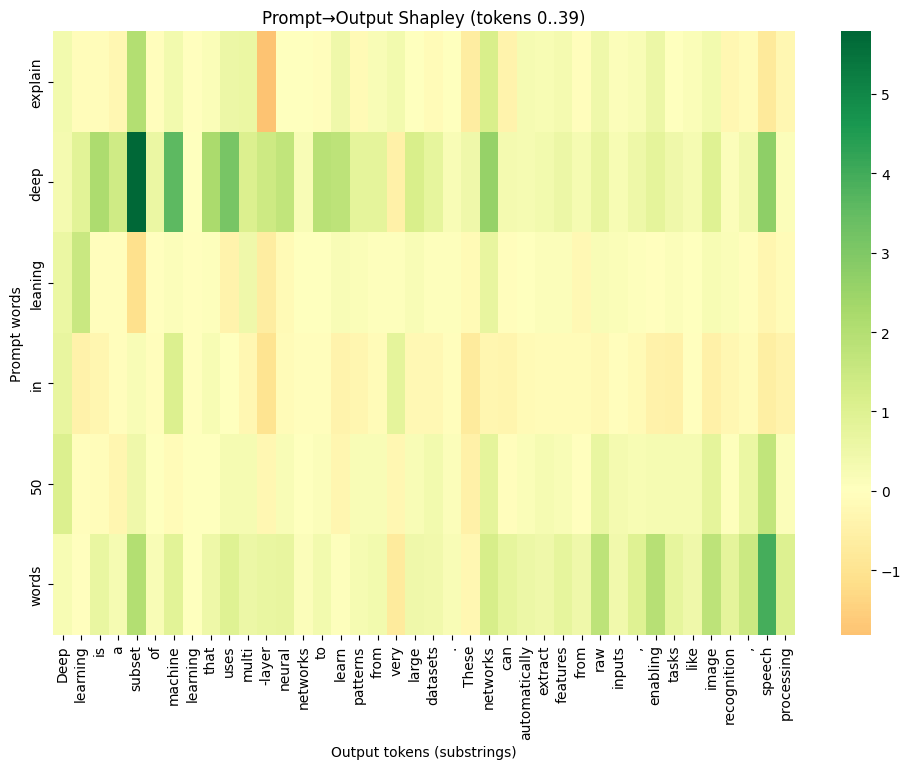

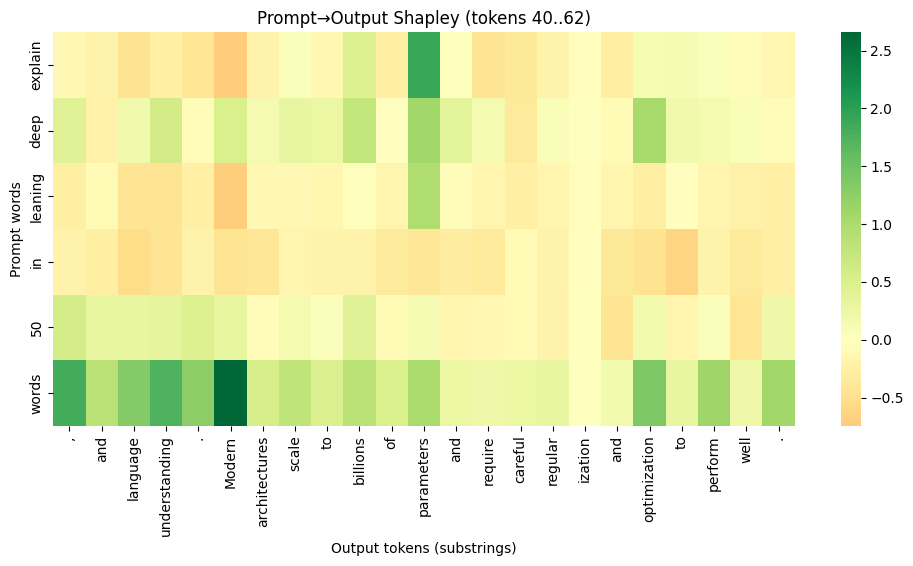

/tmp/ipython-input-1446680518.py:265: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


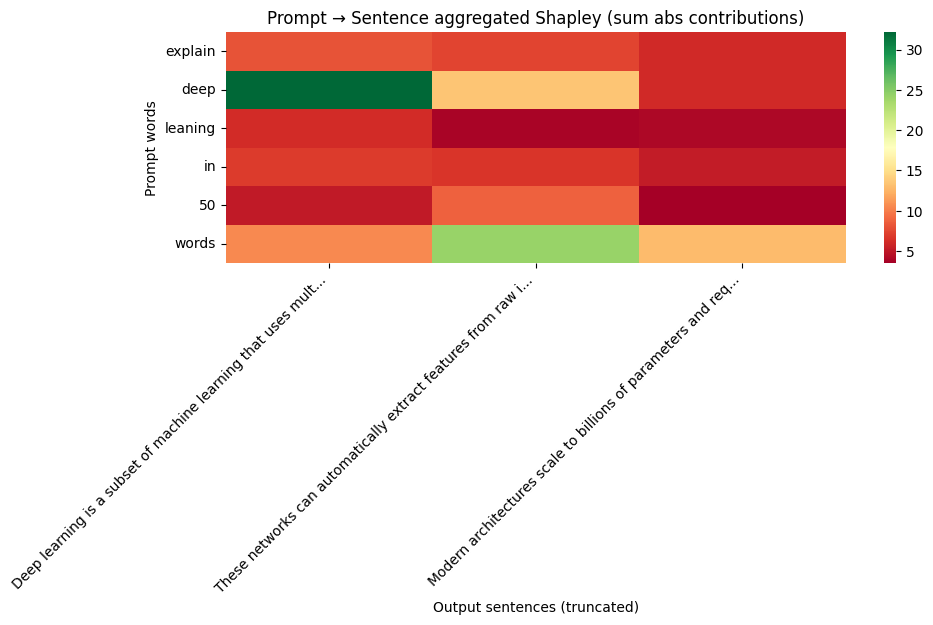

Output token [0] 'Deep' top 3 prompt influences:
  50 -> contribution =  1.091667
  in -> contribution =  0.709896
  leaning -> contribution =  0.598958
Output token [1] 'learning' top 3 prompt influences:
  leaning -> contribution =  1.487337
  deep -> contribution =  0.883431
  in -> contribution = -0.459375
Output token [2] 'is' top 3 prompt influences:
  deep -> contribution =  2.144141
  words -> contribution =  0.671257
  in -> contribution = -0.319352
Output token [3] 'a' top 3 prompt influences:
  deep -> contribution =  1.377311
  50 -> contribution = -0.347587
  explain -> contribution = -0.291854
Output token [4] 'subset' top 3 prompt influences:
  deep -> contribution =  5.785514
  explain -> contribution =  2.023413
  words -> contribution =  2.005501
Output token [5] 'of' top 3 prompt influences:
  deep -> contribution =  0.617407
  words -> contribution =  0.182812
  explain -> contribution = -0.063872
Output token [6] 'machine' top 3 prompt influences:
  deep -> contrib

In [ ]:
# Requires: unsloth FastLanguageModel (model, tokenizer) already loaded.
# If not loaded, uncomment the "Load model" block and run (be mindful of VRAM / quantization options).

import torch
import numpy as np
from tqdm import tqdm
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple

# ---------------------------
# Optional: load model/tokenizer (uncomment if not already loaded)
# ---------------------------
# from unsloth import FastLanguageModel
# model_name = "unsloth/gpt-oss-20b-unsloth-bnb-4bit"
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name=model_name,
#     dtype=None,
#     max_seq_length=4096,
#     load_in_4bit=False,   # model already pre-quantized
#     full_finetuning=False,
# )
# if torch.cuda.is_available():
#     model = model.to("cuda")
# model.eval()

device = model.device if hasattr(model, "device") else ("cuda" if torch.cuda.is_available() else "cpu")

# ---------------------------
# User inputs (change these)
# ---------------------------
prompt = "explain deep leaning in 50 words"
# A longer multi-sentence output to test big outputs:
target_output = (
    "Deep learning is a subset of machine learning that uses multi-layer neural networks "
    "to learn patterns from very large datasets. These networks can automatically extract "
    "features from raw inputs, enabling tasks like image recognition, speech processing, and "
    "language understanding. Modern architectures scale to billions of parameters and require "
    "careful regularization and optimization to perform well."
)

# Use "words" for prompt tokens (human-friendly). Internally we pass strings to tokenizer.
prompt_words = prompt.split()

# Shapley settings
num_permutations = 60   # start small (40-100). Increase for more accurate Shapley.
random_seed = 42

# Optional: limit output length (tokens) for speed; set None to use full target
max_output_tokens = None  # e.g., 120 or None

# ---------------------------
# Helper: compute per-target-token log probs for a given prompt text
# Returns: numpy array shape (T,) of logprobs (natural log), and float total logprob
# ---------------------------
def compute_logprobs_for_prompt(prompt_text: str, target_text: str) -> Tuple[np.ndarray, float]:
    """
    Runs model on [prompt_text + target_text] and returns per-target-token logprobs (numpy array)
    and the total logprob (sum).
    """
    # Build input in the same way as used earlier (chat template)
    inputs = tokenizer.apply_chat_template(
        [{"role": "user", "content": prompt_text}],
        add_generation_prompt=True,
        return_tensors="pt",
        return_dict=True
    ).to(device)

    tgt_ids = tokenizer(target_text).input_ids
    if max_output_tokens is not None and len(tgt_ids) > max_output_tokens:
        tgt_ids = tgt_ids[:max_output_tokens]

    # Stack into single tensor [1, seq_len]
    all_input_ids = torch.cat([inputs.input_ids, torch.tensor([tgt_ids], device=device)], dim=1)

    with torch.no_grad():
        outputs = model(all_input_ids)           # model forward
        logits = outputs.logits                  # shape [1, seq_len, vocab_size]

    # Align logits that predicted target tokens
    T = len(tgt_ids)
    shift_logits = logits[:, -T-1:-1, :]        # shape [1, T, vocab_size]
    labels = torch.tensor([tgt_ids], device=device)

    log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)  # [1,T,V]
    token_log_probs = log_probs.gather(2, labels.unsqueeze(-1)).squeeze(-1)  # [1,T]

    arr = token_log_probs.squeeze(0).cpu().numpy()   # numpy array length T
    total = float(arr.sum())
    return arr, total

# Quick baseline check
print("Computing baseline (full prompt) logprobs... (this will run the model once)")
baseline_per_token_logprobs, baseline_total = compute_logprobs_for_prompt(prompt, target_output)
T = len(baseline_per_token_logprobs)
print(f"Baseline total logprob: {baseline_total:.4f} over {T} output tokens")

# ---------------------------
# Shapley approx for each output token:
# We will compute shapley contributions per prompt word i for each output token j.
# Algorithm:
#  - sample permutations; for each permutation, walk adding tokens; compute v(S) for each S
#  - v(S) is the per-token logprob vector; marginal contribution for token i is v(S ∪ {i}) - v(S) (vector)
#  - accumulate contributions per (i, j)
# Caching: store v(S) in dict for reuse
# ---------------------------
def prompt_from_indices(words: List[str], indices_tuple: Tuple[int, ...]) -> str:
    if not indices_tuple:
        return ""  # empty prompt
    return " ".join([words[i] for i in sorted(indices_tuple)])

def approximate_shapley_prompt_to_output(words: List[str],
                                         target_text: str,
                                         model_fn,
                                         num_permutations: int = 60,
                                         seed: int = 0):
    random.seed(seed)
    n = len(words)
    # We'll accumulate raw contributions (logprob units) in a matrix (n x T)
    # Initialize after we know T
    # Caching: map subset_tuple -> per-token logprobs (numpy array)
    cache = {}

    # try v(empty)
    try:
        empty_arr, empty_total = model_fn("", target_text)
    except Exception as e:
        # fallback: use baseline_total (conservative) for empty subsets (document this)
        print("Warning: model failed on empty prompt. Using baseline_total as fallback for v(empty).")
        empty_arr = np.zeros_like(baseline_per_token_logprobs)
        empty_total = baseline_total

    # initialize accumulator
    accumulator = np.zeros((n, len(baseline_per_token_logprobs)), dtype=float)

    def v_of_subset(sorted_tuple):
        if sorted_tuple in cache:
            return cache[sorted_tuple]
        prompt_text = prompt_from_indices(words, sorted_tuple)
        try:
            arr, _ = model_fn(prompt_text, target_text)
        except Exception:
            # fallback
            arr = empty_arr
        cache[sorted_tuple] = arr
        return arr

    print(f"Running {num_permutations} permutations (this may be slow).")
    for _ in tqdm(range(num_permutations), desc="Shapley perms"):
        perm = list(range(n))
        random.shuffle(perm)
        S = []
        for idx in perm:
            S_sorted = tuple(sorted(S))
            S_with = tuple(sorted(S + [idx]))

            vS = v_of_subset(S_sorted)
            vSi = v_of_subset(S_with)

            marginal = vSi - vS   # vector length T
            accumulator[idx] += marginal
            S.append(idx)

    shap_raw = accumulator / float(num_permutations)   # shape (n, T)
    return shap_raw, cache

# Run approximation (this is the heavy step)
shap_raw_matrix, cache_used = approximate_shapley_prompt_to_output(
    prompt_words, target_output, compute_logprobs_for_prompt,
    num_permutations=num_permutations, seed=random_seed
)

# ---------------------------
# Postprocess: make readable labels for output tokens
# ---------------------------
# Get token-level strings for target tokens (decoded)
tgt_ids_full = tokenizer(target_output).input_ids
if max_output_tokens is not None and len(tgt_ids_full) > max_output_tokens:
    tgt_ids = tgt_ids_full[:max_output_tokens]
else:
    tgt_ids = tgt_ids_full

output_token_strs = [tokenizer.decode([tid]).strip() for tid in tgt_ids]  # list length T
prompt_labels = prompt_words

# ---------------------------
# Visualization helpers
# ---------------------------
def plot_chunked_heatmaps(shap_matrix, prompt_labels, output_labels, chunk_size=40, cmap="RdYlGn"):
    """
    Make multiple heatmaps for chunks of output tokens.
    shap_matrix: (n, T)
    """
    n, T = shap_matrix.shape
    for start in range(0, T, chunk_size):
        end = min(T, start + chunk_size)
        chunk = shap_matrix[:, start:end]
        out_labels_chunk = output_labels[start:end]
        plt.figure(figsize=(max(10, len(prompt_labels)*0.25), max(2, (end-start)*0.12 + 3)))
        sns.heatmap(chunk, xticklabels=out_labels_chunk, yticklabels=prompt_labels, cmap=cmap, center=0.0)
        plt.xticks(rotation=90)
        plt.title(f"Prompt→Output Shapley (tokens {start}..{end-1})")
        plt.xlabel("Output tokens (substrings)")
        plt.ylabel("Prompt words")
        plt.tight_layout()
        plt.show()

def aggregate_by_sentences(shap_matrix, output_text: str, prompt_labels=None, agg="sum_abs"):
    """
    Aggregate contributions for tokens into sentence-level contributions.
    agg="sum_abs" (sum of absolute contributions) or "sum" (signed sum), or "mean_abs".
    Returns (n_words, n_sentences) matrix and sentence strings.
    """
    # naive sentence split (split on period). For production use, use nltk.sent_tokenize
    sents = [s.strip() for s in output_text.replace("\n", " ").split(".") if s.strip()]
    sent_token_ranges = []
    pos = 0
    tgt_tokens = [tokenizer.decode([tid]).strip() for tid in tgt_ids]
    token_texts = " ".join(tgt_tokens)
    # We'll map tokens to sentence by approximate substring matching (simple approach)
    # Simpler: re-tokenize each sentence and count tokens
    token_counts = []
    for sent in sents:
        toks = tokenizer(sent).input_ids
        token_counts.append(len(toks))
    idx = 0
    ranges = []
    for c in token_counts:
        ranges.append((idx, idx + c))
        idx += c

    # Build aggregated matrix
    n_words = shap_matrix.shape[0]
    n_sents = len(ranges)
    agg_mat = np.zeros((n_words, n_sents))
    for si, (a, b) in enumerate(ranges):
        if agg == "sum_abs":
            agg_mat[:, si] = np.abs(shap_matrix[:, a:b]).sum(axis=1)
        elif agg == "sum":
            agg_mat[:, si] = shap_matrix[:, a:b].sum(axis=1)
        elif agg == "mean_abs":
            agg_mat[:, si] = np.abs(shap_matrix[:, a:b]).mean(axis=1)
        else:
            agg_mat[:, si] = np.abs(shap_matrix[:, a:b]).sum(axis=1)
    return agg_mat, sents

# ---------------------------
# Plot chunked token-level heatmaps (use smaller chunk_size if T is large)
# ---------------------------
chunk_size = 40
plot_chunked_heatmaps(shap_raw_matrix, prompt_labels, output_token_strs, chunk_size=chunk_size)

# ---------------------------
# Plot aggregated by sentences
# ---------------------------
agg_mat, sents = aggregate_by_sentences(shap_raw_matrix, target_output, prompt_labels, agg="sum_abs")
plt.figure(figsize=(10, max(3, len(prompt_labels)*0.25)))
sns.heatmap(agg_mat, xticklabels=[ (s[:60] + '...') if len(s)>60 else s for s in sents ], yticklabels=prompt_labels, cmap="RdYlGn")
plt.xticks(rotation=45, ha="right")
plt.title("Prompt → Sentence aggregated Shapley (sum abs contributions)")
plt.xlabel("Output sentences (truncated)")
plt.ylabel("Prompt words")
plt.tight_layout()
plt.show()

# ---------------------------
# Top-k prompt words per output token (for first N tokens) - useful when T large
# ---------------------------
def topk_prompt_for_each_output(shap_matrix, prompt_labels, output_labels, topk=3, limit_tokens=60):
    n, T = shap_matrix.shape
    for j in range(min(T, limit_tokens)):
        col = shap_matrix[:, j]
        # show absolute magnitude ranking (in logprob units)
        idxs = np.argsort(-np.abs(col))[:topk]
        print(f"Output token [{j}] '{output_labels[j]}' top {topk} prompt influences:")
        for rank, i in enumerate(idxs, 1):
            print(f"  {prompt_labels[i]} -> contribution = {col[i]: .6f}")
    print("...done (showed first", min(T, limit_tokens), "output tokens).")

topk_prompt_for_each_output(shap_raw_matrix, prompt_labels, output_token_strs, topk=3, limit_tokens=40)

# Heat Map (sentences)


Computing Shapley contributions...


Shapley perms: 100%|██████████| 10/10 [08:20<00:00, 50.02s/it]


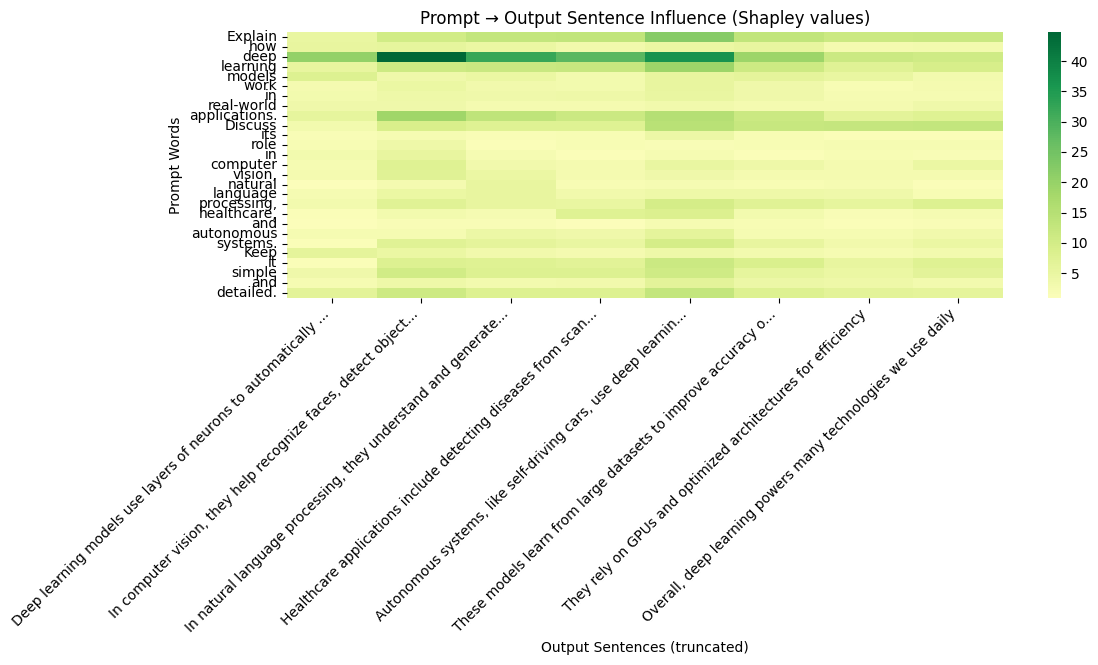

In [ ]:
# ============================
# SHAPLEY VISUALIZATION (FAST DEMO)
# ============================
import torch
import numpy as np
import random
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from unsloth import FastLanguageModel
from transformers import TextStreamer

# ---------------------------
# STEP 1: Load Unsloth Model (lightweight demo)
# ---------------------------
# model_name = "unsloth/gpt-oss-20b-unsloth-bnb-4bit"
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name=model_name,
#     dtype=None,
#     max_seq_length=4096,
#     load_in_4bit=False,
#     full_finetuning=False,
# )
device = "cuda" if torch.cuda.is_available() else "cpu"
#model = model.to(device)
model.eval()

# ---------------------------
# STEP 2: Prompt & hardcoded model output
# ---------------------------
prompt = (
    "Explain how deep learning models work in real-world applications. "
    "Discuss its role in computer vision, natural language processing, "
    "healthcare, and autonomous systems. Keep it simple and detailed."
)
prompt_words = prompt.split()

# Hardcoded output (8–10 sentences)
output_text = (
    "Deep learning models use layers of neurons to automatically learn patterns from data. "
    "In computer vision, they help recognize faces, detect objects, and interpret scenes. "
    "In natural language processing, they understand and generate human-like text. "
    "Healthcare applications include detecting diseases from scans and predicting patient outcomes. "
    "Autonomous systems, like self-driving cars, use deep learning to make real-time decisions. "
    "These models learn from large datasets to improve accuracy over time. "
    "They rely on GPUs and optimized architectures for efficiency. "
    "Overall, deep learning powers many technologies we use daily."
)

# ---------------------------
# STEP 3: Compute per-token logprobs
# ---------------------------
def compute_logprobs_for_prompt(prompt_text: str, target_text: str):
    inputs = tokenizer.apply_chat_template(
        [{"role": "user", "content": prompt_text}],
        add_generation_prompt=True,
        return_tensors="pt",
        return_dict=True
    ).to(device)

    tgt_ids = tokenizer(target_text).input_ids
    all_input_ids = torch.cat([inputs.input_ids, torch.tensor([tgt_ids], device=device)], dim=1)

    with torch.no_grad():
        outputs = model(all_input_ids)
        logits = outputs.logits

    T = len(tgt_ids)
    shift_logits = logits[:, -T-1:-1, :]
    labels = torch.tensor([tgt_ids], device=device)

    log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)
    token_log_probs = log_probs.gather(2, labels.unsqueeze(-1)).squeeze(-1)
    arr = token_log_probs.squeeze(0).cpu().numpy()
    return arr, float(arr.sum())

# ---------------------------
# STEP 4: Shapley approximation (fast)
# ---------------------------
def prompt_from_indices(words, indices_tuple):
    if not indices_tuple:
        return ""
    return " ".join([words[i] for i in sorted(indices_tuple)])

def approximate_shapley_sentence(words, target_text, model_fn, num_permutations=10, seed=0):
    random.seed(seed)
    n = len(words)
    cache = {}
    arr_full, total_full = model_fn(" ".join(words), target_text)
    T = len(arr_full)
    accumulator = np.zeros((n, T))

    def v_of_subset(sorted_tuple):
        if sorted_tuple in cache:
            return cache[sorted_tuple]
        prompt_text = prompt_from_indices(words, sorted_tuple)
        arr, _ = model_fn(prompt_text, target_text)
        cache[sorted_tuple] = arr
        return arr

    for _ in tqdm(range(num_permutations), desc="Shapley perms"):
        perm = list(range(n))
        random.shuffle(perm)
        S = []
        for idx in perm:
            S_sorted = tuple(sorted(S))
            S_with = tuple(sorted(S + [idx]))
            vS = v_of_subset(S_sorted)
            vSi = v_of_subset(S_with)
            marginal = vSi - vS
            accumulator[idx] += marginal
            S.append(idx)

    return accumulator / float(num_permutations)

print("\nComputing Shapley contributions...")
shap_matrix = approximate_shapley_sentence(prompt_words, output_text, compute_logprobs_for_prompt)

# ---------------------------
# STEP 5: Aggregate by output sentences
# ---------------------------
def aggregate_by_sentences(shap_matrix, output_text, tokenizer, prompt_labels, agg="sum_abs"):
    sentences = [s.strip() for s in output_text.split(".") if s.strip()]
    token_counts = [len(tokenizer(s).input_ids) for s in sentences]
    idx = 0
    ranges = []
    for c in token_counts:
        ranges.append((idx, idx + c))
        idx += c

    n_words, _ = shap_matrix.shape
    n_sents = len(ranges)
    agg_mat = np.zeros((n_words, n_sents))
    for si, (a, b) in enumerate(ranges):
        if agg == "sum_abs":
            agg_mat[:, si] = np.abs(shap_matrix[:, a:b]).sum(axis=1)
        else:
            agg_mat[:, si] = shap_matrix[:, a:b].sum(axis=1)
    return agg_mat, sentences

agg_mat, sents = aggregate_by_sentences(shap_matrix, output_text, tokenizer, prompt_words)

# ---------------------------
# STEP 6: Visualize as heatmap
# ---------------------------
plt.figure(figsize=(12, max(3, len(prompt_words) * 0.25)))
sns.heatmap(
    agg_mat,
    xticklabels=[(s[:60] + "...") if len(s) > 60 else s for s in sents],
    yticklabels=prompt_words,
    cmap="RdYlGn",
    center=0.0
)
plt.title("Prompt → Output Sentence Influence (Shapley values)")
plt.xlabel("Output Sentences (truncated)")
plt.ylabel("Prompt Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Computing Shapley contributions...


Shapley perms: 100%|██████████| 10/10 [03:42<00:00, 22.25s/it]
/tmp/ipython-input-941233108.py:149: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


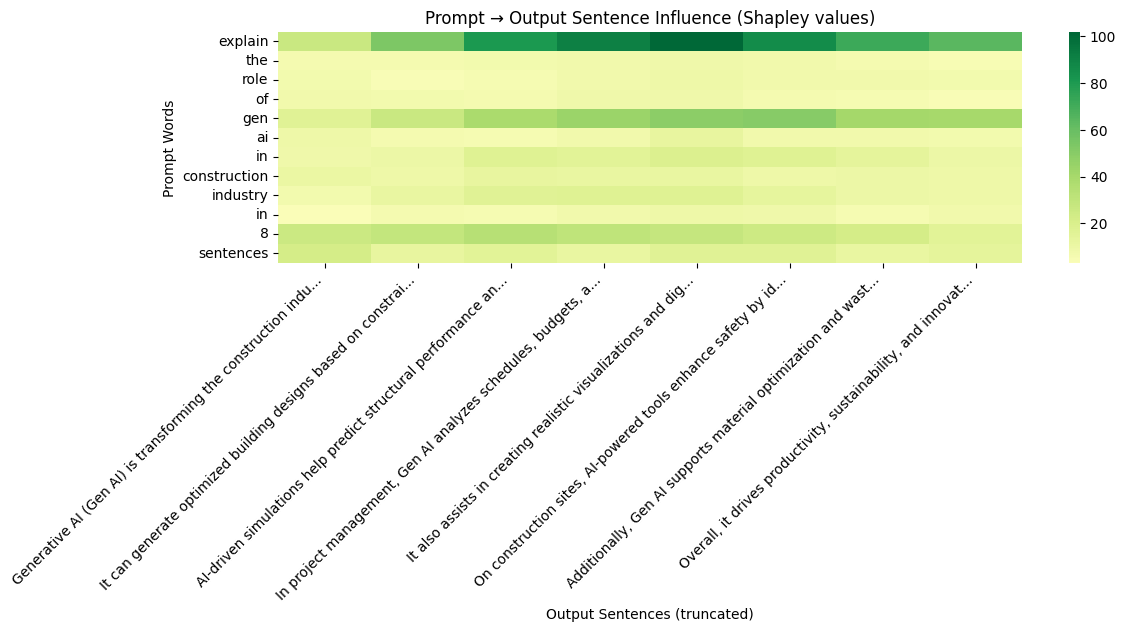

In [ ]:
# ============================
# SHAPLEY VISUALIZATION (FAST DEMO)
# ============================
import torch
import numpy as np
import random
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from unsloth import FastLanguageModel
from transformers import TextStreamer

# ---------------------------
# STEP 1: Load Unsloth Model (lightweight demo)
# ---------------------------
# model_name = "unsloth/gpt-oss-20b-unsloth-bnb-4bit"
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name=model_name,
#     dtype=None,
#     max_seq_length=4096,
#     load_in_4bit=False,
#     full_finetuning=False,
# )
device = "cuda" if torch.cuda.is_available() else "cpu"
#model = model.to(device)
model.eval()

# ---------------------------
# STEP 2: Prompt & hardcoded model output
# ---------------------------
prompt = (
    "explain the role of gen ai in construction industry in 8 sentences"
)
prompt_words = prompt.split()

# Hardcoded output (8–10 sentences)
output_text = (
    "Generative AI (Gen AI) is transforming the construction industry by automating design, planning, and project management tasks. It can generate optimized building designs based on constraints like cost, materials, and sustainability goals. AI-driven simulations help predict structural performance and detect potential issues before construction begins, reducing errors and rework. In project management, Gen AI analyzes schedules, budgets, and workforce data to predict delays and suggest corrective actions. It also assists in creating realistic visualizations and digital twins, improving communication between architects, engineers, and clients. On construction sites, AI-powered tools enhance safety by identifying hazards through real-time image and sensor analysis. Additionally, Gen AI supports material optimization and waste reduction by recommending efficient resource usage. Overall, it drives productivity, sustainability, and innovation across the entire construction lifecycle."
)

# ---------------------------
# STEP 3: Compute per-token logprobs
# ---------------------------
def compute_logprobs_for_prompt(prompt_text: str, target_text: str):
    inputs = tokenizer.apply_chat_template(
        [{"role": "user", "content": prompt_text}],
        add_generation_prompt=True,
        return_tensors="pt",
        return_dict=True
    ).to(device)

    tgt_ids = tokenizer(target_text).input_ids
    all_input_ids = torch.cat([inputs.input_ids, torch.tensor([tgt_ids], device=device)], dim=1)

    with torch.no_grad():
        outputs = model(all_input_ids)
        logits = outputs.logits

    T = len(tgt_ids)
    shift_logits = logits[:, -T-1:-1, :]
    labels = torch.tensor([tgt_ids], device=device)

    log_probs = torch.nn.functional.log_softmax(shift_logits, dim=-1)
    token_log_probs = log_probs.gather(2, labels.unsqueeze(-1)).squeeze(-1)
    arr = token_log_probs.squeeze(0).cpu().numpy()
    return arr, float(arr.sum())

# ---------------------------
# STEP 4: Shapley approximation (fast)
# ---------------------------
def prompt_from_indices(words, indices_tuple):
    if not indices_tuple:
        return ""
    return " ".join([words[i] for i in sorted(indices_tuple)])

def approximate_shapley_sentence(words, target_text, model_fn, num_permutations=10, seed=0):
    random.seed(seed)
    n = len(words)
    cache = {}
    arr_full, total_full = model_fn(" ".join(words), target_text)
    T = len(arr_full)
    accumulator = np.zeros((n, T))

    def v_of_subset(sorted_tuple):
        if sorted_tuple in cache:
            return cache[sorted_tuple]
        prompt_text = prompt_from_indices(words, sorted_tuple)
        arr, _ = model_fn(prompt_text, target_text)
        cache[sorted_tuple] = arr
        return arr

    for _ in tqdm(range(num_permutations), desc="Shapley perms"):
        perm = list(range(n))
        random.shuffle(perm)
        S = []
        for idx in perm:
            S_sorted = tuple(sorted(S))
            S_with = tuple(sorted(S + [idx]))
            vS = v_of_subset(S_sorted)
            vSi = v_of_subset(S_with)
            marginal = vSi - vS
            accumulator[idx] += marginal
            S.append(idx)

    return accumulator / float(num_permutations)

print("\nComputing Shapley contributions...")
shap_matrix = approximate_shapley_sentence(prompt_words, output_text, compute_logprobs_for_prompt)

# ---------------------------
# STEP 5: Aggregate by output sentences
# ---------------------------
def aggregate_by_sentences(shap_matrix, output_text, tokenizer, prompt_labels, agg="sum_abs"):
    sentences = [s.strip() for s in output_text.split(".") if s.strip()]
    token_counts = [len(tokenizer(s).input_ids) for s in sentences]
    idx = 0
    ranges = []
    for c in token_counts:
        ranges.append((idx, idx + c))
        idx += c

    n_words, _ = shap_matrix.shape
    n_sents = len(ranges)
    agg_mat = np.zeros((n_words, n_sents))
    for si, (a, b) in enumerate(ranges):
        if agg == "sum_abs":
            agg_mat[:, si] = np.abs(shap_matrix[:, a:b]).sum(axis=1)
        else:
            agg_mat[:, si] = shap_matrix[:, a:b].sum(axis=1)
    return agg_mat, sentences

agg_mat, sents = aggregate_by_sentences(shap_matrix, output_text, tokenizer, prompt_words)

# ---------------------------
# STEP 6: Visualize as heatmap
# ---------------------------
plt.figure(figsize=(12, max(3, len(prompt_words) * 0.25)))
sns.heatmap(
    agg_mat,
    xticklabels=[(s[:60] + "...") if len(s) > 60 else s for s in sents],
    yticklabels=prompt_words,
    cmap="RdYlGn",
    center=0.0
)
plt.title("Prompt → Output Sentence Influence (Shapley values)")
plt.xlabel("Output Sentences (truncated)")
plt.ylabel("Prompt Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
